## Plotting CDFs for all basket trap pairs

Importing Libraries

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
import seaborn as sns

Defining Functions

In [2]:
# removing outlier GSDs
def remove_outlier_gsd(matrix):
    # calculating representative sizes
    matrix_d16 = np.percentile(matrix, 16, axis=0)
    matrix_d50 = np.percentile(matrix, 50, axis=0)
    matrix_d84 = np.percentile(matrix, 84, axis=0)
    # calculating Quartile 1
    tempCalc1 = np.percentile(matrix_d16, 25)
    tempCalc2 = np.percentile(matrix_d50, 25)
    tempCalc3 = np.percentile(matrix_d84, 25)
    matrix_q1 = np.array((tempCalc1, tempCalc2, tempCalc3)) # d16, d50, d84
    # calculating Quartile 3
    tempCalc1 = np.percentile(matrix_d16, 75)
    tempCalc2 = np.percentile(matrix_d50, 75)
    tempCalc3 = np.percentile(matrix_d84, 75)
    matrix_q3 = np.array((tempCalc1, tempCalc2, tempCalc3)) # d16, d50, d84
    # calculating IQR and lower/upper bounds
    spring_wc_IQR = matrix_q3 - matrix_q1
    lower_bound = matrix_q1 - 1.5*spring_wc_IQR
    upper_bound = matrix_q3 + 1.5*spring_wc_IQR
    # identifying GSDs with representative sizes outside the range
    tempBool1 = np.where(matrix_d16 < lower_bound[0], True, False)
    tempBool2 = np.where(matrix_d50 < lower_bound[1], True, False)
    tempBool3 = np.where(matrix_d84 < lower_bound[2], True, False)
    tempBool1 + tempBool2 + tempBool3
    np.arange(len(tempBool1))[tempBool1 + tempBool2 + tempBool3]
    # identifying GSDs with representative sizes outside the range
    tempBool4 = np.where(matrix_d16 > upper_bound[0], True, False)
    tempBool5 = np.where(matrix_d50 > upper_bound[1], True, False)
    tempBool6 = np.where(matrix_d84 > upper_bound[2], True, False)
    tempBool4 + tempBool5 + tempBool6
    np.arange(len(tempBool4))[tempBool4 + tempBool5 + tempBool6]
    # deleting outlier GSDs
    tempCalc1 = np.arange(len(tempBool1))[tempBool1 + tempBool2 + tempBool3 + tempBool4 + tempBool5 + tempBool6]
    tempCalc2 = np.delete(matrix, tempCalc1, axis=1)
    
    return tempCalc2

Importing Data

In [3]:
# checking environment and working directory
import os
os.getcwd()
working_directory = "C:/Users/nicol/Documents/GitHub/La_Jara/GSD/trap_CDFs/"
os.chdir(working_directory)

# filenames and directories
results_directory = "./plots_ipynb/"
filename1 = "./Spring_2023_watercolumn_percentage.csv"
filename2 = "./Spring_2023_basket_percentage.csv"
filename3 = "./Summer_2023_watercolumn_percentage.csv"
filename4 = "./Summer_2023_basket_percentage.csv"

# reading files
dataframe1 = pd.read_csv(filename1)
dataframe2 = pd.read_csv(filename2)
dataframe3 = pd.read_csv(filename3)
dataframe4 = pd.read_csv(filename4)

# getting information
grain_sizes = np.array(dataframe1.iloc[:-1, 0])
proportion1 = np.array(dataframe1.iloc[:-1, 1:]) # spring water column
proportion2 = np.array(dataframe2.iloc[:-1, 1:]) # spring basket
proportion3 = np.array(dataframe3.iloc[:-1, 1:]) # summer water column
proportion4 = np.array(dataframe4.iloc[:-1, 1:]) # summer basket

Calculations

In [4]:
# calculating cumulative sum
spring_wc_gsd = np.cumsum(proportion1, axis=0)
spring_st_gsd = np.cumsum(proportion2, axis=0)
summer_wc_gsd = np.cumsum(proportion3, axis=0)
summer_st_gsd = np.cumsum(proportion4, axis=0)

# removing outlier GSDs
spring_wc_gsd = remove_outlier_gsd(spring_wc_gsd)
summer_wc_gsd = remove_outlier_gsd(summer_wc_gsd)

# calculating max, avg and min GSDs of the water columns
spring_wc_gsd_max = pd.DataFrame(np.max(spring_wc_gsd, axis=1))
spring_wc_gsd_avg = pd.DataFrame(np.mean(spring_wc_gsd, axis=1))
spring_wc_gsd_min = pd.DataFrame(np.min(spring_wc_gsd, axis=1))
summer_wc_gsd_max = pd.DataFrame(np.max(summer_wc_gsd, axis=1))
summer_wc_gsd_avg = pd.DataFrame(np.mean(summer_wc_gsd, axis=1))
summer_wc_gsd_min = pd.DataFrame(np.min(summer_wc_gsd, axis=1))

# calculating max, avg and min GSDs of the baskets
spring_st_gsd_max = pd.DataFrame(np.max(spring_st_gsd, axis=1))
spring_st_gsd_avg = pd.DataFrame(np.mean(spring_st_gsd, axis=1))
spring_st_gsd_min = pd.DataFrame(np.min(spring_st_gsd, axis=1))
summer_st_gsd_max = pd.DataFrame(np.max(summer_st_gsd, axis=1))
summer_st_gsd_avg = pd.DataFrame(np.mean(summer_st_gsd, axis=1))
summer_st_gsd_min = pd.DataFrame(np.min(summer_st_gsd, axis=1))

# convert to pandas dataframe
spring_wc_gsd = pd.DataFrame(spring_wc_gsd)
spring_st_gsd = pd.DataFrame(spring_st_gsd)
summer_wc_gsd = pd.DataFrame(summer_wc_gsd)
summer_st_gsd = pd.DataFrame(summer_st_gsd)

# column names of dataframes are the same as the ones from dataframe1, 2, 3 and 4
spring_st_gsd.columns = dataframe2.columns[1:]
summer_st_gsd.columns = dataframe4.columns[1:]

# add max, avg and min GSDs to the dataframes as new columns
spring_wc_gsd["max"] = spring_wc_gsd_max
spring_wc_gsd["avg"] = spring_wc_gsd_avg
spring_wc_gsd["min"] = spring_wc_gsd_min
summer_wc_gsd["max"] = summer_wc_gsd_max
summer_wc_gsd["avg"] = summer_wc_gsd_avg
summer_wc_gsd["min"] = summer_wc_gsd_min

# make the index of the dataframes the values in grain_sizes array
spring_wc_gsd.index = grain_sizes
spring_st_gsd.index = grain_sizes
summer_wc_gsd.index = grain_sizes
summer_st_gsd.index = grain_sizes


## Plots

T1 - A & B

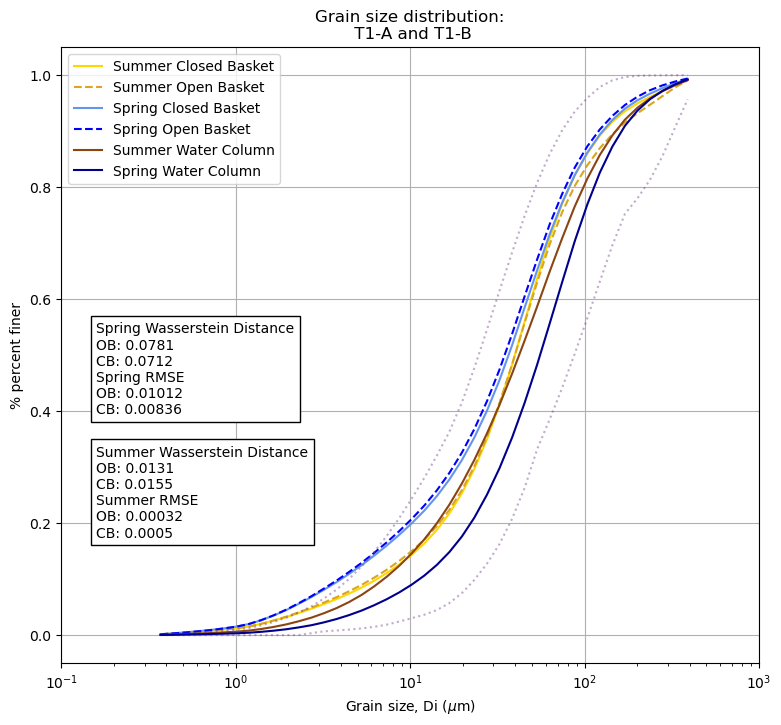

In [5]:
# determining parameters
title = "Grain size distribution:\n T1-A and T1-B"
outname = "T1A-T1B"

# summer
summer_open = summer_st_gsd['T1-B'].values.flatten()
summer_closed = summer_st_gsd['T1-A'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T1-B'].values.flatten()
spring_closed = spring_st_gsd['T1-A'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T1 - C & D

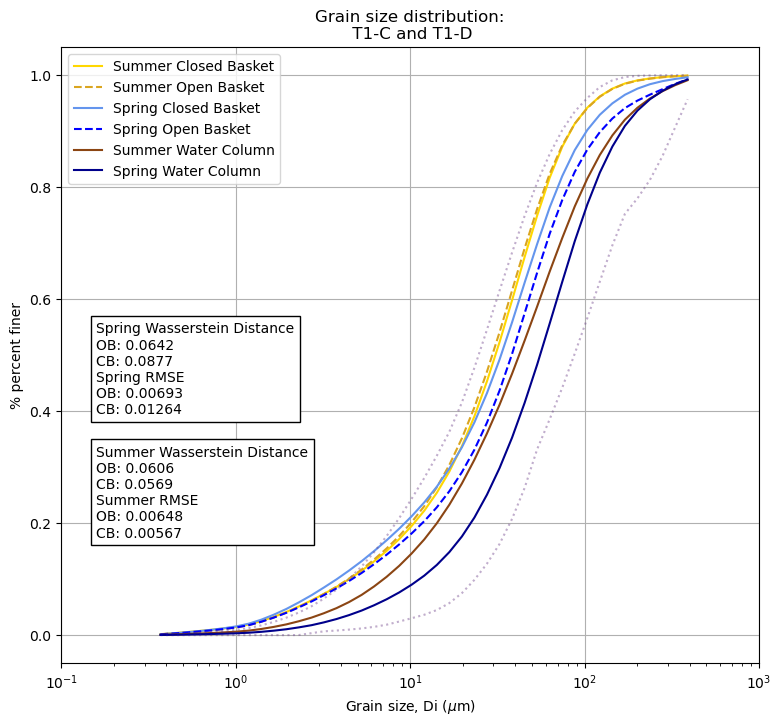

In [6]:
# determining parameters
title = "Grain size distribution:\n T1-C and T1-D"
outname = "T1C-T1D"

# summer
summer_open = summer_st_gsd['T1-C'].values.flatten()
summer_closed = summer_st_gsd['T1-D'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T1-C'].values.flatten()
spring_closed = spring_st_gsd['T1-D'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T2 - A & B

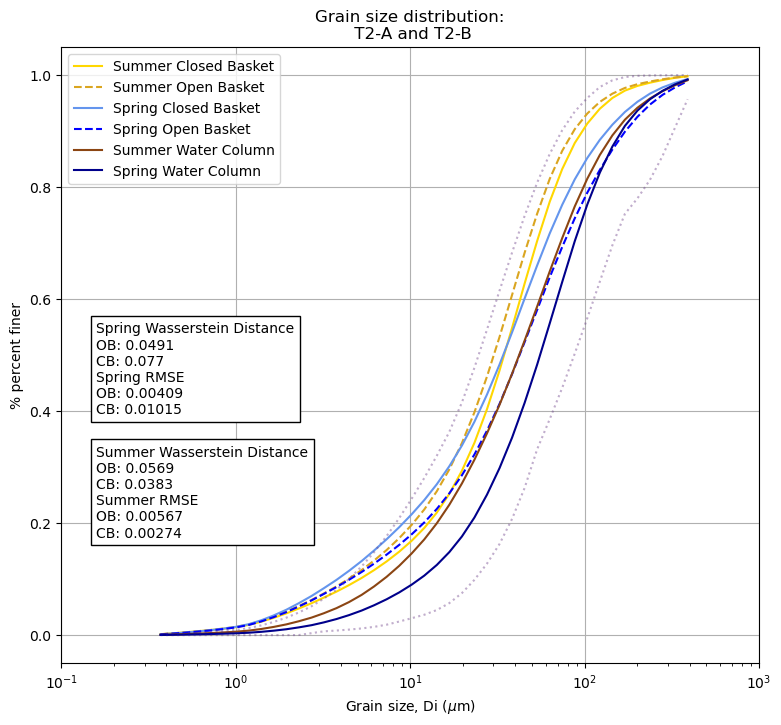

In [7]:
# determining parameters
title = "Grain size distribution:\n T2-A and T2-B"
outname = "T2A-T2B"

# summer
summer_open = summer_st_gsd['T2-B'].values.flatten()
summer_closed = summer_st_gsd['T2-A'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T2-B'].values.flatten()
spring_closed = spring_st_gsd['T2-A'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T3 - C & D

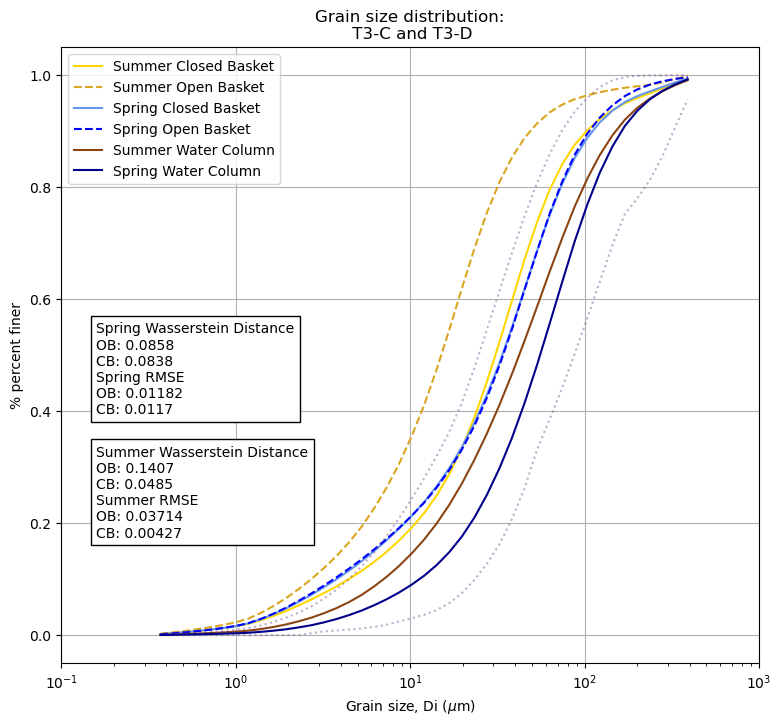

In [8]:
# determining parameters
title = "Grain size distribution:\n T3-C and T3-D"
outname = "T3C-T3D"

# summer
summer_open = summer_st_gsd['T3-C'].values.flatten()
summer_closed = summer_st_gsd['T3-D'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T3-C'].values.flatten()
spring_closed = spring_st_gsd['T3-D'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T5 - A & B

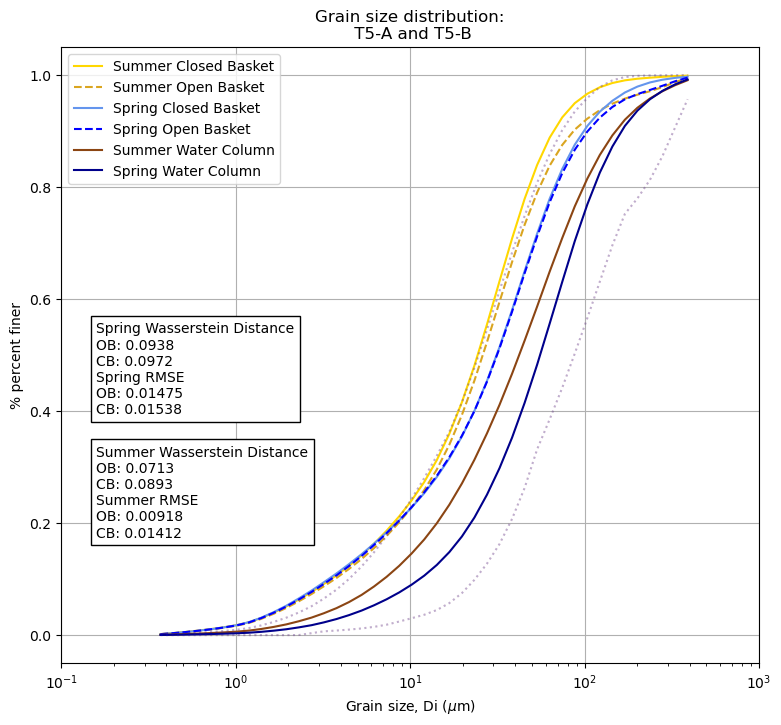

In [9]:
# determining parameters
title = "Grain size distribution:\n T5-A and T5-B"
outname = "T5A-T5B"

# summer
summer_open = summer_st_gsd['T5-B'].values.flatten()
summer_closed = summer_st_gsd['T5-A'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T5-B'].values.flatten()
spring_closed = spring_st_gsd['T5-A'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T5 - C & D

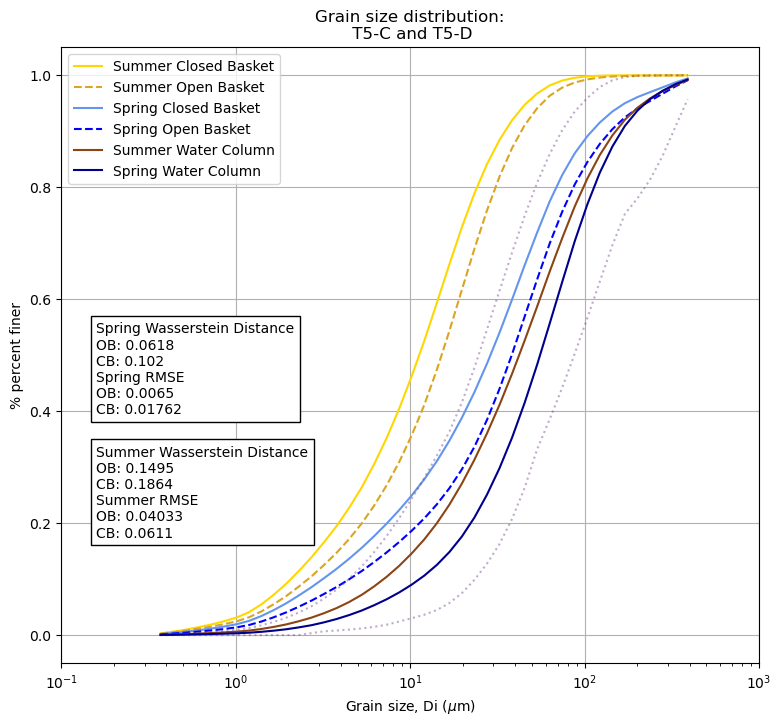

In [10]:
# determining parameters
title = "Grain size distribution:\n T5-C and T5-D"
outname = "T5C-T5D"

# summer
summer_open = summer_st_gsd['T5-C'].values.flatten()
summer_closed = summer_st_gsd['T5-D'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T5-C'].values.flatten()
spring_closed = spring_st_gsd['T5-D'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T6 - C & D 

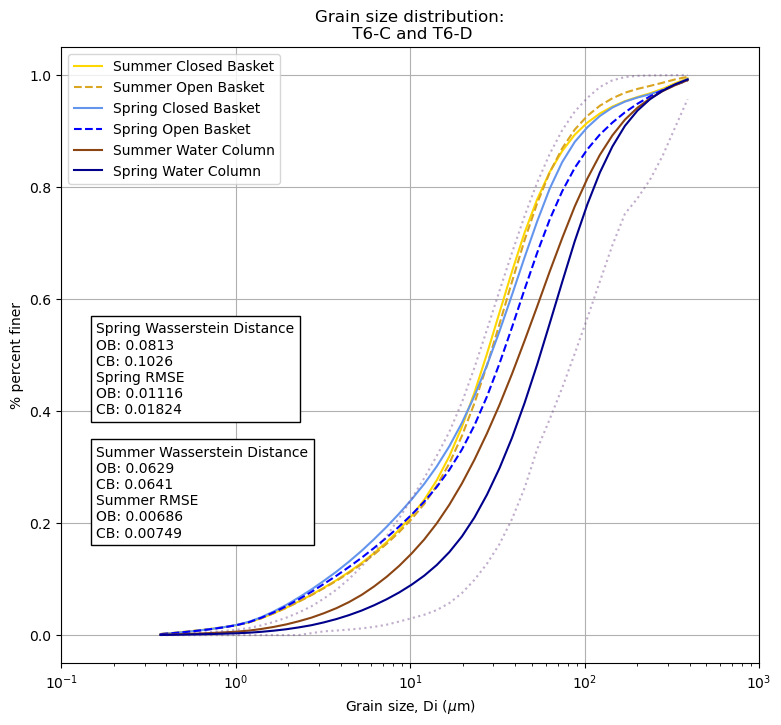

In [11]:
# determining parameters
title = "Grain size distribution:\n T6-C and T6-D"
outname = "T6C-T6D"

# summer
summer_open = summer_st_gsd['T6-C'].values.flatten()
summer_closed = summer_st_gsd['T6-D'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T6-C'].values.flatten()
spring_closed = spring_st_gsd['T6-D'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T7 - A & B

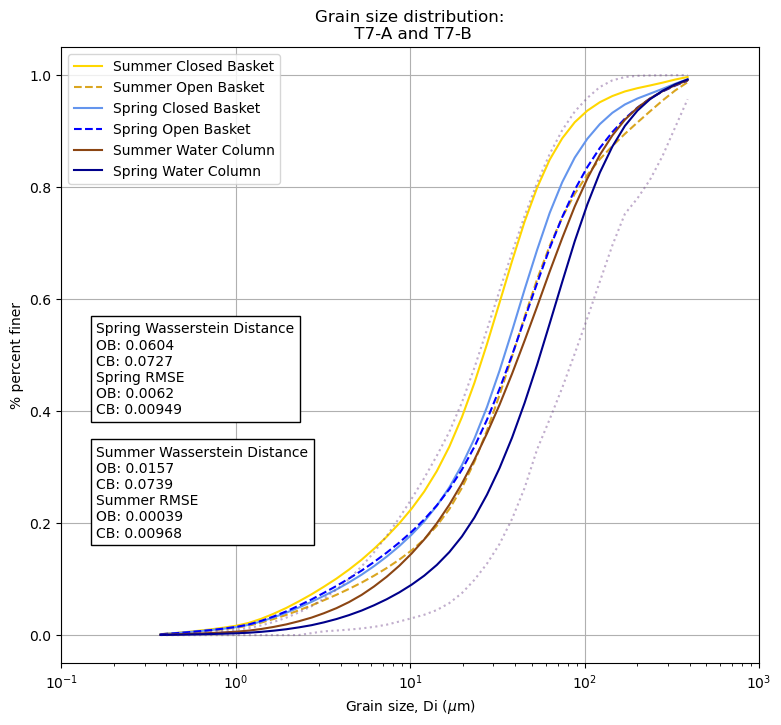

In [12]:
# determining parameters
title = "Grain size distribution:\n T7-A and T7-B"
outname = "T7A-T7B"

# summer
summer_open = summer_st_gsd['T7-B'].values.flatten()
summer_closed = summer_st_gsd['T7-A'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T7-B'].values.flatten()
spring_closed = spring_st_gsd['T7-A'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T7 - C & D 

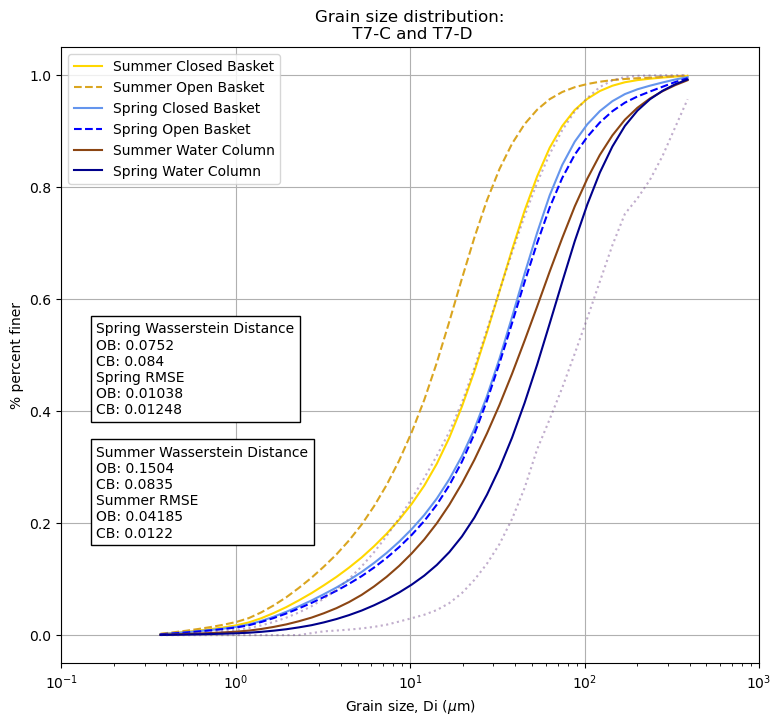

In [13]:
# determining parameters
title = "Grain size distribution:\n T7-C and T7-D"
outname = "T7C-T7D"

# summer
summer_open = summer_st_gsd['T7-C'].values.flatten()
summer_closed = summer_st_gsd['T7-D'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T7-C'].values.flatten()
spring_closed = spring_st_gsd['T7-D'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

T8 - C & D

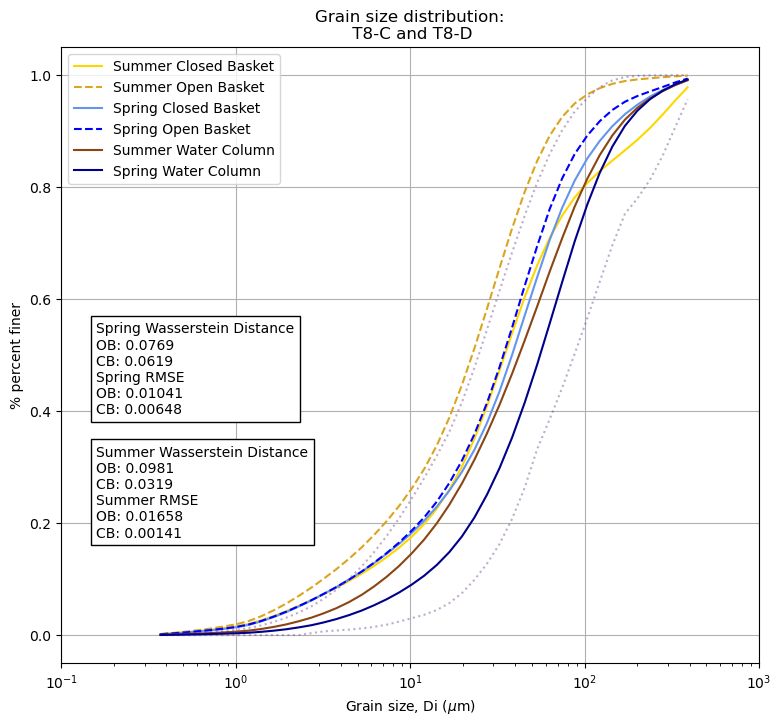

In [14]:
# determining parameters
title = "Grain size distribution:\n T8-C and T8-D"
outname = "T8C-T8D"

# summer
summer_open = summer_st_gsd['T8-C'].values.flatten()
summer_closed = summer_st_gsd['T8-D'].values.flatten()
summer_open_color = 'goldenrod'
summer_closed_color = 'gold'
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
# spring 
spring_open = spring_st_gsd['T8-C'].values.flatten()
spring_closed = spring_st_gsd['T8-D'].values.flatten()
spring_open_color = 'blue'
spring_closed_color = 'cornflowerblue'
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
grain_sizes = np.array(summer_st_gsd.index)

# calculating Wasserstein distance and RMSE
# summer
summer_distance_closed = np.round(wasserstein_distance(summer_closed, summer_wc_gsd_avg_array),4)
summer_distance_open = np.round(wasserstein_distance(summer_open, summer_wc_gsd_avg_array),4)
summer_rmse_closed = np.round(np.mean((summer_closed - summer_wc_gsd_avg_array)**2), 5)
summer_rmse_open = np.round(np.mean((summer_open - summer_wc_gsd_avg_array)**2), 5)
# spring
spring_distance_closed = np.round(wasserstein_distance(spring_closed, spring_wc_gsd_avg_array),4)
spring_distance_open = np.round(wasserstein_distance(spring_open, spring_wc_gsd_avg_array),4)
spring_rmse_closed = np.round(np.mean((spring_closed - spring_wc_gsd_avg_array)**2), 5)
spring_rmse_open = np.round(np.mean((spring_open - spring_wc_gsd_avg_array)**2), 5)

# finding the min and max GSDs for the plot
minGSD = np.minimum(spring_wc_gsd_min, summer_wc_gsd_min)
maxGSD = np.maximum(spring_wc_gsd_max, summer_wc_gsd_max)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor':'white'})
# basket plots
plt.plot(grain_sizes, summer_closed, color=summer_closed_color, label="Summer Closed Basket", linestyle="solid")
plt.plot(grain_sizes, summer_open, color=summer_open_color, label="Summer Open Basket", linestyle="dashed")
plt.plot(grain_sizes, spring_closed, color=spring_closed_color, label="Spring Closed Basket", linestyle="solid")
plt.plot(grain_sizes, spring_open, color=spring_open_color, label="Spring Open Basket", linestyle="dashed")
# water column plot
#summer
plt.plot(grain_sizes, maxGSD, color="orange", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, summer_wc_gsd_avg, color="saddlebrown", label="Summer Water Column")
plt.plot(grain_sizes, minGSD, color="orange", linestyle=":", alpha=0.25)
#spring
plt.plot(grain_sizes, maxGSD, color="blue", linestyle=":", alpha=0.25)
plt.plot(grain_sizes, spring_wc_gsd_avg, color="darkblue", label="Spring Water Column")
plt.plot(grain_sizes, minGSD, color="blue", linestyle=":", alpha=0.25)

# text boxes
tempString1 = "Summer Wasserstein Distance\nOB: "+str(summer_distance_open) +"\nCB: "+str(summer_distance_closed) +\
                "\nSummer RMSE\nOB: "+str(summer_rmse_open) +"\nCB: "+str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Spring Wasserstein Distance\nOB: " + str(spring_distance_open) + "\nCB: " + str(spring_distance_closed) + \
                "\nSpring RMSE\nOB: " + str(spring_rmse_open) + "\nCB: " + str(spring_rmse_closed)
plt.text(0.05, 0.4, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

## Combined Basket Types 

Calculations

In [15]:
# separate dataframes by open and closed baskets
# closed baskets (ending in 'A' or 'D') and open baskets (ending in 'B' or 'C')
summer_open = summer_st_gsd.filter(regex='[BC]$')
summer_closed = summer_st_gsd.filter(regex='[AD]$')
spring_open = spring_st_gsd.filter(regex='[BC]$')
spring_closed = spring_st_gsd.filter(regex='[AD]$')

# separate by upwelling and downwelling per season
# all the ones that start with T5
summer_open_upwelling = summer_open.filter(regex='^T5')
summer_closed_upwelling = summer_closed.filter(regex='^T5')
# all others are downwelling
summer_open_downwelling = summer_open.drop(summer_open_upwelling.columns, axis=1)
summer_closed_downwelling = summer_closed.drop(summer_closed_upwelling.columns, axis=1)
# all the ones that start with T5 and T1
spring_open_upwelling = spring_open.filter(regex='^(T5|T1)')
spring_closed_upwelling = spring_closed.filter(regex='^(T5|T1)')
# all others are downwelling
spring_open_downwelling = spring_open.drop(spring_open_upwelling.columns, axis=1)
spring_closed_downwelling = spring_closed.drop(spring_closed_upwelling.columns, axis=1)

# calculate the max, average, and min for each row in the DataFrame
# open baskets
spring_open_max = spring_open.max(axis=1).to_frame(name='max')
spring_open_avg = spring_open.mean(axis=1).to_frame(name='avg')
spring_open_min = spring_open.min(axis=1).to_frame(name='min')
summer_open_max = summer_open.max(axis=1).to_frame(name='max')
summer_open_avg = summer_open.mean(axis=1).to_frame(name='avg')
summer_open_min = summer_open.min(axis=1).to_frame(name='min')
# closed baskets
spring_closed_max = spring_closed.max(axis=1).to_frame(name='max')
spring_closed_avg = spring_closed.mean(axis=1).to_frame(name='avg')
spring_closed_min = spring_closed.min(axis=1).to_frame(name='min')
summer_closed_max = summer_closed.max(axis=1).to_frame(name='max')
summer_closed_avg = summer_closed.mean(axis=1).to_frame(name='avg')
summer_closed_min = summer_closed.min(axis=1).to_frame(name='min')

# ensuring everything is 1D
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
summer_wc_gsd_min = summer_wc_gsd_min.squeeze().values
summer_wc_gsd_max = summer_wc_gsd_max.squeeze().values
summer_open_avg = spring_open_avg.squeeze().values
summer_open_min = summer_open_min.squeeze().values
summer_open_max = summer_open_max.squeeze().values
summer_closed_avg = spring_closed_avg.squeeze().values
summer_closed_min = summer_closed_min.squeeze().values
summer_closed_max = summer_closed_max.squeeze().values
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
spring_wc_gsd_min = spring_wc_gsd_min.squeeze().values
spring_wc_gsd_max = spring_wc_gsd_max.squeeze().values
spring_open_avg = spring_open_avg.squeeze().values
spring_open_min = spring_open_min.squeeze().values
spring_open_max = spring_open_max.squeeze().values
spring_closed_avg = spring_closed_avg.squeeze().values
spring_closed_min = spring_closed_min.squeeze().values
spring_closed_max = spring_closed_max.squeeze().values


Summer Open

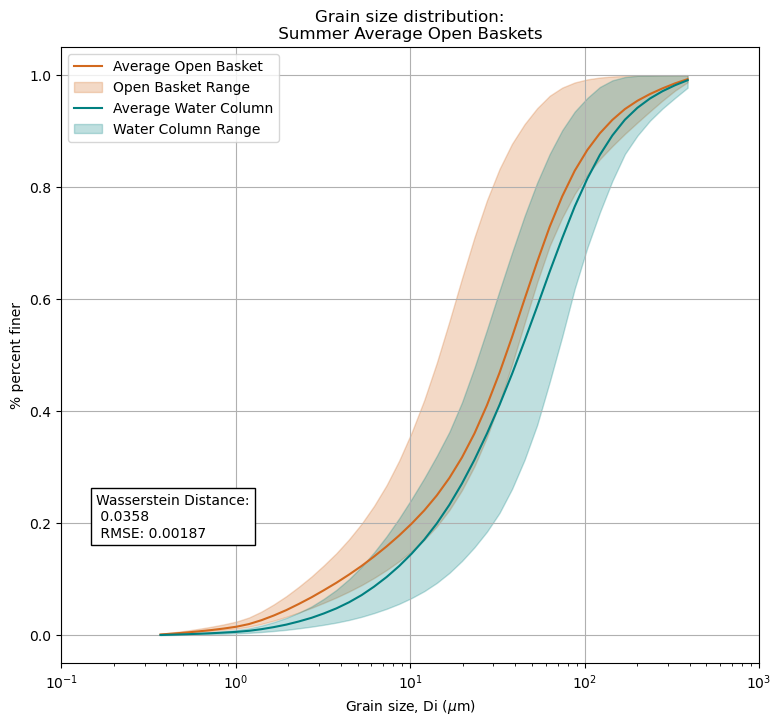

In [16]:
# determining parameters
title = "Grain size distribution:\n Summer Average Open Baskets "
outname = "summer_average_open_baskets"

# calculating Wasserstein distance and RMSE
summer_distance_open = np.round(wasserstein_distance(summer_open_avg, summer_wc_gsd_avg_array), 4)
summer_rmse_open = np.round(np.mean((summer_open_avg - summer_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, summer_open_avg, color='chocolate', 
                label="Average Open Basket", linestyle="solid")
plt.fill_between(grain_sizes, summer_open_min, summer_open_max, color="chocolate", 
                label="Open Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, summer_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, summer_wc_gsd_min, summer_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + str(summer_distance_open) + "\n RMSE: " + str(summer_rmse_open)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

Summer Closed

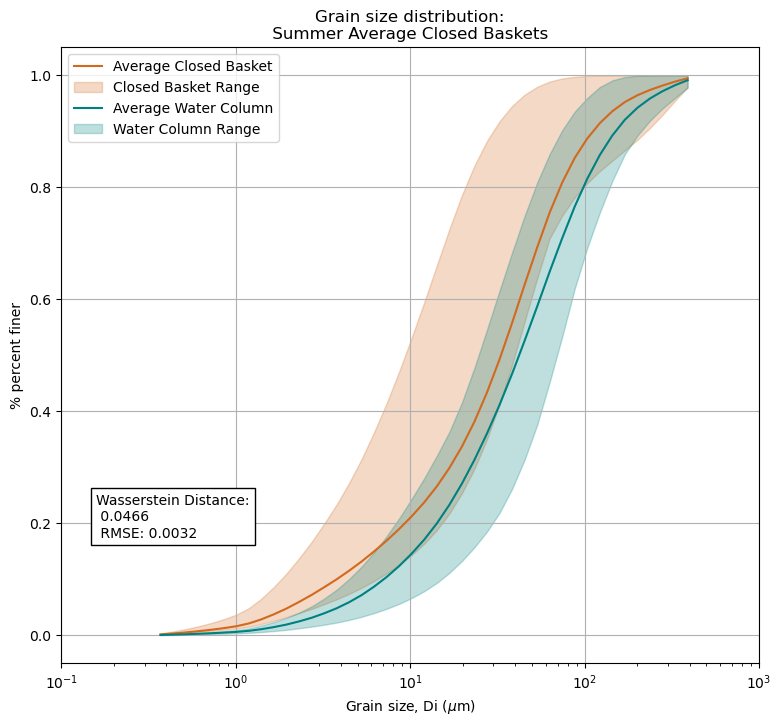

In [17]:
# determining parameters
title = "Grain size distribution:\n Summer Average Closed Baskets "
outname = "summer_average_closed_baskets"

# calculating Wasserstein distance and RMSE
summer_distance_closed = np.round(wasserstein_distance(summer_closed_avg, summer_wc_gsd_avg_array), 4)
summer_rmse_closed = np.round(np.mean((summer_closed_avg - summer_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, summer_closed_avg, color='chocolate', 
                label="Average Closed Basket", linestyle="solid")
plt.fill_between(grain_sizes, summer_closed_min, summer_closed_max, color="chocolate", 
                label="Closed Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, summer_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, summer_wc_gsd_min, summer_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + str(summer_distance_closed) + "\n RMSE: " + str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

Summer - Closed and Open

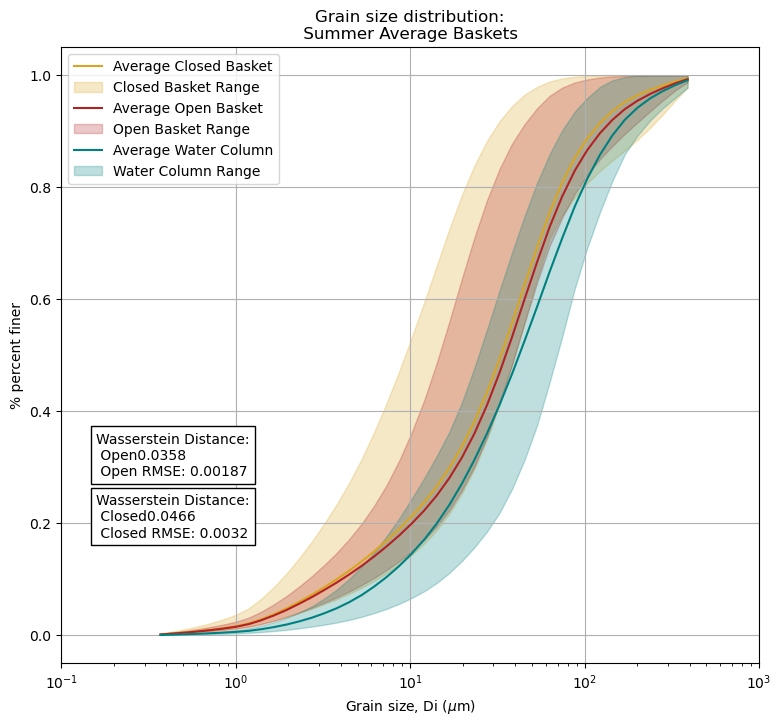

In [18]:
# determining parameters
title = "Grain size distribution:\n Summer Average Baskets "
outname = "summer_average_baskets"

# calculating Wasserstein distance and RMSE
summer_distance_closed = np.round(wasserstein_distance(summer_closed_avg, summer_wc_gsd_avg_array), 4)
summer_rmse_closed = np.round(np.mean((summer_closed_avg - summer_wc_gsd_avg_array)**2), 5)
summer_distance_open = np.round(wasserstein_distance(summer_open_avg, summer_wc_gsd_avg_array), 4)
summer_rmse_open = np.round(np.mean((summer_open_avg - summer_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, summer_closed_avg, color='goldenrod', 
                label="Average Closed Basket", linestyle="solid")
plt.fill_between(grain_sizes, summer_closed_min, summer_closed_max, color="goldenrod", 
                label="Closed Basket Range", alpha=0.25)
plt.plot(grain_sizes, summer_open_avg, color='firebrick',
                label="Average Open Basket", linestyle="solid")
plt.fill_between(grain_sizes, summer_open_min, summer_open_max, color="firebrick",
                label="Open Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, summer_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, summer_wc_gsd_min, summer_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + "Closed" + str(summer_distance_closed) + "\n Closed RMSE: " + str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Wasserstein Distance:\n " + "Open" + str(summer_distance_open) + "\n Open RMSE: " + str(summer_rmse_open)
plt.text(0.05, 0.3, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

Spring Open

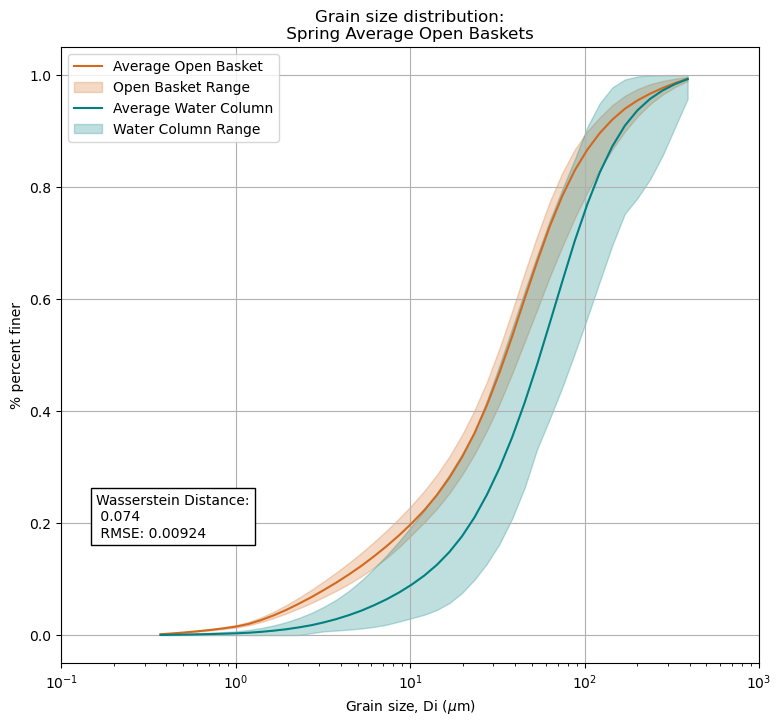

In [19]:
# determining parameters
title = "Grain size distribution:\n Spring Average Open Baskets "
outname = "spring_average_open_baskets"

# calculating Wasserstein distance and RMSE
spring_distance_open = np.round(wasserstein_distance(spring_open_avg, spring_wc_gsd_avg_array), 4)
spring_rmse_open = np.round(np.mean((spring_open_avg - spring_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, spring_open_avg, color='chocolate', 
                label="Average Open Basket", linestyle="solid")
plt.fill_between(grain_sizes, spring_open_min, spring_open_max, color="chocolate", 
                label="Open Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, spring_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, spring_wc_gsd_min, spring_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + str(spring_distance_open) + "\n RMSE: " + str(spring_rmse_open)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

Spring Closed

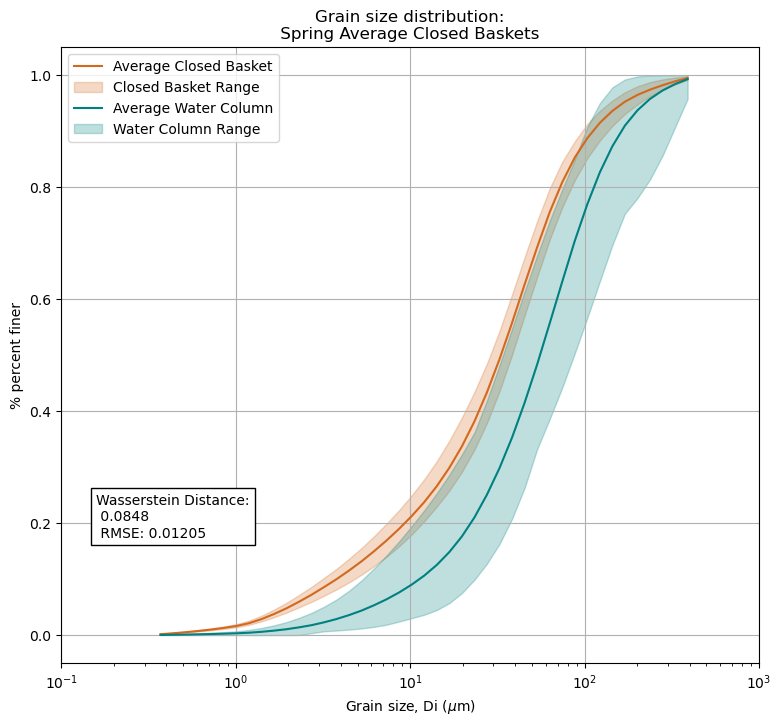

In [20]:
# determining parameters
title = "Grain size distribution:\n Spring Average Closed Baskets "
outname = "spring_average_closed_baskets"

# calculating Wasserstein distance and RMSE
spring_distance_closed = np.round(wasserstein_distance(spring_closed_avg, spring_wc_gsd_avg_array), 4)
spring_rmse_closed = np.round(np.mean((spring_closed_avg - spring_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, spring_closed_avg, color='chocolate', 
                label="Average Closed Basket", linestyle="solid")
plt.fill_between(grain_sizes, spring_closed_min, spring_closed_max, color="chocolate",
                label="Closed Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, spring_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, spring_wc_gsd_min, spring_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + str(spring_distance_closed) + "\n RMSE: " + str(spring_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

Spring - Open and Closed

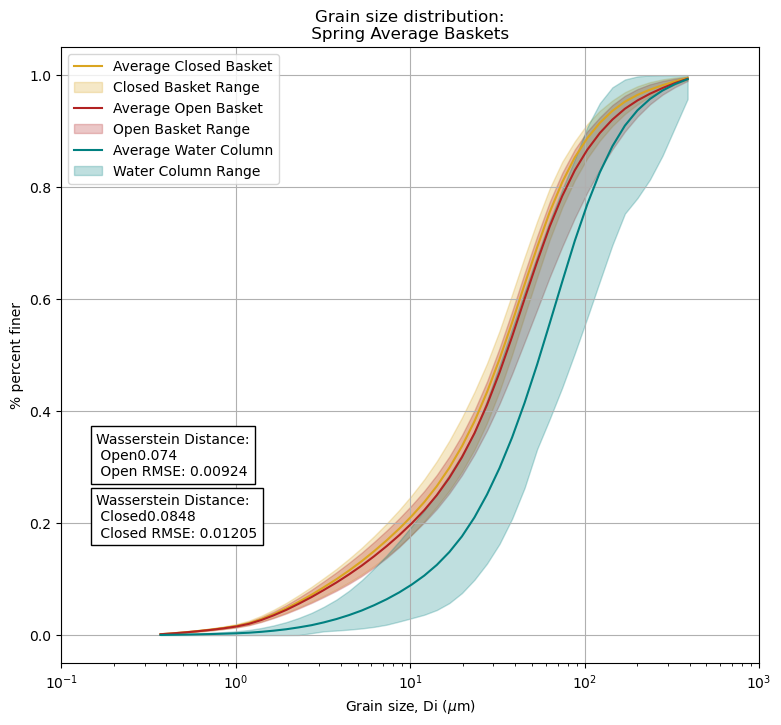

In [21]:
# determining parameters
title = "Grain size distribution:\n Spring Average Baskets "
outname = "spring_average_baskets"

# calculating Wasserstein distance and RMSE
spring_distance_closed = np.round(wasserstein_distance(spring_closed_avg, spring_wc_gsd_avg_array), 4)
spring_rmse_closed = np.round(np.mean((spring_closed_avg - spring_wc_gsd_avg_array)**2), 5)
spring_distance_open = np.round(wasserstein_distance(spring_open_avg, spring_wc_gsd_avg_array), 4)
spring_rmse_open = np.round(np.mean((spring_open_avg - spring_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, spring_closed_avg, color='goldenrod', 
                label="Average Closed Basket", linestyle="solid")
plt.fill_between(grain_sizes, spring_closed_min, spring_closed_max, color="goldenrod",
                label="Closed Basket Range", alpha=0.25)
plt.plot(grain_sizes, spring_open_avg, color='firebrick',
                label="Average Open Basket", linestyle="solid")
plt.fill_between(grain_sizes, spring_open_min, spring_open_max, color="firebrick",
                label="Open Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, spring_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, spring_wc_gsd_min, spring_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + "Closed" + str(spring_distance_closed) + "\n Closed RMSE: " + str(spring_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Wasserstein Distance:\n " + "Open" + str(spring_distance_open) + "\n Open RMSE: " + str(spring_rmse_open)
plt.text(0.05, 0.3, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()


### Combined - By upwelling and downwelling

Calculations

In [22]:
# calculate the max, average, and min for each row in the DataFrame
# UPWELLING
# open baskets
spring_open_upwelling_max = spring_open_upwelling.max(axis=1).to_frame(name='max')
spring_open_upwelling_avg = spring_open_upwelling.mean(axis=1).to_frame(name='avg')
spring_open_upwelling_min = spring_open_upwelling.min(axis=1).to_frame(name='min')
summer_open_upwelling_max = summer_open_upwelling.max(axis=1).to_frame(name='max')
summer_open_upwelling_avg = summer_open_upwelling.mean(axis=1).to_frame(name='avg')
summer_open_upwelling_min = summer_open_upwelling.min(axis=1).to_frame(name='min')
# closed baskets
spring_closed_upwelling_max = spring_closed_upwelling.max(axis=1).to_frame(name='max')
spring_closed_upwelling_avg = spring_closed_upwelling.mean(axis=1).to_frame(name='avg')
spring_closed_upwelling_min = spring_closed_upwelling.min(axis=1).to_frame(name='min')
summer_closed_upwelling_max = summer_closed_upwelling.max(axis=1).to_frame(name='max')
summer_closed_upwelling_avg = summer_closed_upwelling.mean(axis=1).to_frame(name='avg')
summer_closed_upwelling_min = summer_closed_upwelling.min(axis=1).to_frame(name='min')

# DOWNWELLING
# open baskets
spring_open_downwelling_max = spring_open_downwelling.max(axis=1).to_frame(name='max')
spring_open_downwelling_avg = spring_open_downwelling.mean(axis=1).to_frame(name='avg')
spring_open_downwelling_min = spring_open_downwelling.min(axis=1).to_frame(name='min')
summer_open_downwelling_max = summer_open_downwelling.max(axis=1).to_frame(name='max')
summer_open_downwelling_avg = summer_open_downwelling.mean(axis=1).to_frame(name='avg')
summer_open_downwelling_min = summer_open_downwelling.min(axis=1).to_frame(name='min')
# closed baskets
spring_closed_downwelling_max = spring_closed_downwelling.max(axis=1).to_frame(name='max')
spring_closed_downwelling_avg = spring_closed_downwelling.mean(axis=1).to_frame(name='avg')
spring_closed_downwelling_min = spring_closed_downwelling.min(axis=1).to_frame(name='min')
summer_closed_downwelling_max = summer_closed_downwelling.max(axis=1).to_frame(name='max')
summer_closed_downwelling_avg = summer_closed_downwelling.mean(axis=1).to_frame(name='avg')
summer_closed_downwelling_min = summer_closed_downwelling.min(axis=1).to_frame(name='min')

# ensuring everything is 1D
summer_wc_gsd_avg_array = summer_wc_gsd_avg.squeeze().values
summer_open_upwelling = summer_open_upwelling_avg.squeeze().values
summer_open_upwelling_min = summer_open_upwelling_min.squeeze().values
summer_open_upwelling_max = summer_open_upwelling_max.squeeze().values
summer_closed_upwelling = summer_closed_upwelling_avg.squeeze().values
summer_closed_upwelling_min = summer_closed_upwelling_min.squeeze().values
summer_closed_upwelling_max = summer_closed_upwelling_max.squeeze().values
summer_open_downwelling = summer_open_downwelling_avg.squeeze().values
summer_open_downwelling_min = summer_open_downwelling_min.squeeze().values
summer_open_downwelling_max = summer_open_downwelling_max.squeeze().values
summer_closed_downwelling = summer_closed_downwelling_avg.squeeze().values
summer_closed_downwelling_min = summer_closed_downwelling_min.squeeze().values
summer_closed_downwelling_max = summer_closed_downwelling_max.squeeze().values
spring_wc_gsd_avg_array = spring_wc_gsd_avg.squeeze().values
spring_open_upwelling = spring_open_upwelling_avg.squeeze().values
spring_open_upwelling_min = spring_open_upwelling_min.squeeze().values
spring_open_upwelling_max = spring_open_upwelling_max.squeeze().values
spring_closed_upwelling = spring_closed_upwelling_avg.squeeze().values
spring_closed_upwelling_min = spring_closed_upwelling_min.squeeze().values
spring_closed_upwelling_max = spring_closed_upwelling_max.squeeze().values
spring_open_downwelling = spring_open_downwelling_avg.squeeze().values
spring_open_downwelling_min = spring_open_downwelling_min.squeeze().values
spring_open_downwelling_max = spring_open_downwelling_max.squeeze().values
spring_closed_downwelling = spring_closed_downwelling_avg.squeeze().values
spring_closed_downwelling_min = spring_closed_downwelling_min.squeeze().values
spring_closed_downwelling_max = spring_closed_downwelling_max.squeeze().values

#### Spring

Upwelling

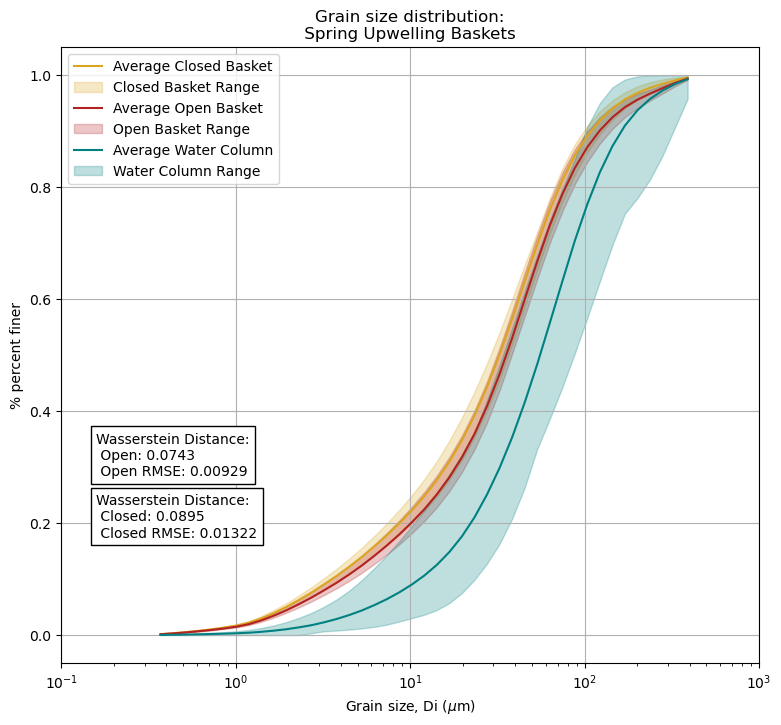

In [23]:
# determining parameters
title = "Grain size distribution:\n Spring Upwelling Baskets "
outname = "spring_upwelling_baskets"

# calculating Wasserstein distance and RMSE
spring_distance_closed = np.round(wasserstein_distance(spring_closed_upwelling, spring_wc_gsd_avg_array), 4)
spring_rmse_closed = np.round(np.mean((spring_closed_upwelling - spring_wc_gsd_avg_array)**2), 5)
spring_distance_open = np.round(wasserstein_distance(spring_open_upwelling, spring_wc_gsd_avg_array), 4)
spring_rmse_open = np.round(np.mean((spring_open_upwelling - spring_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, spring_closed_upwelling, color='goldenrod', 
                label="Average Closed Basket", linestyle="solid")
plt.fill_between(grain_sizes, spring_closed_upwelling_min, spring_closed_upwelling_max, color="goldenrod",
                label="Closed Basket Range", alpha=0.25)
plt.plot(grain_sizes, spring_open_upwelling, color='firebrick',
                label="Average Open Basket", linestyle="solid")
plt.fill_between(grain_sizes, spring_open_upwelling_min, spring_open_upwelling_max, color="firebrick",
                label="Open Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, spring_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, spring_wc_gsd_min, spring_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + "Closed: " + str(spring_distance_closed) + "\n Closed RMSE: " + str(spring_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Wasserstein Distance:\n " + "Open: " + str(spring_distance_open) + "\n Open RMSE: " + str(spring_rmse_open)
plt.text(0.05, 0.3, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

Downwelling

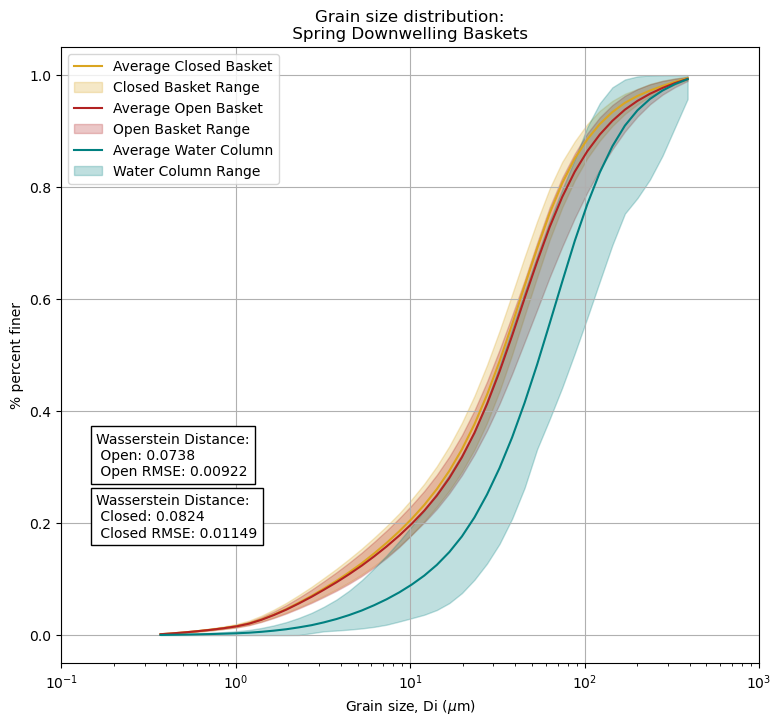

In [24]:
# determining parameters
title = "Grain size distribution:\n Spring Downwelling Baskets "
outname = "spring_downwelling_baskets"

# calculating Wasserstein distance and RMSE
spring_distance_closed = np.round(wasserstein_distance(spring_closed_downwelling, spring_wc_gsd_avg_array), 4)
spring_rmse_closed = np.round(np.mean((spring_closed_downwelling - spring_wc_gsd_avg_array)**2), 5)
spring_distance_open = np.round(wasserstein_distance(spring_open_downwelling, spring_wc_gsd_avg_array), 4)
spring_rmse_open = np.round(np.mean((spring_open_downwelling - spring_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, spring_closed_downwelling, color='goldenrod', 
                label="Average Closed Basket", linestyle="solid")
plt.fill_between(grain_sizes, spring_closed_downwelling_min, spring_closed_downwelling_max, color="goldenrod",
                label="Closed Basket Range", alpha=0.25)
plt.plot(grain_sizes, spring_open_downwelling, color='firebrick',
                label="Average Open Basket", linestyle="solid")
plt.fill_between(grain_sizes, spring_open_downwelling_min, spring_open_downwelling_max, color="firebrick",
                label="Open Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, spring_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, spring_wc_gsd_min, spring_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + "Closed: " + str(spring_distance_closed) + "\n Closed RMSE: " + str(spring_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Wasserstein Distance:\n " + "Open: " + str(spring_distance_open) + "\n Open RMSE: " + str(spring_rmse_open)
plt.text(0.05, 0.3, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

#### Summer

Upwelling

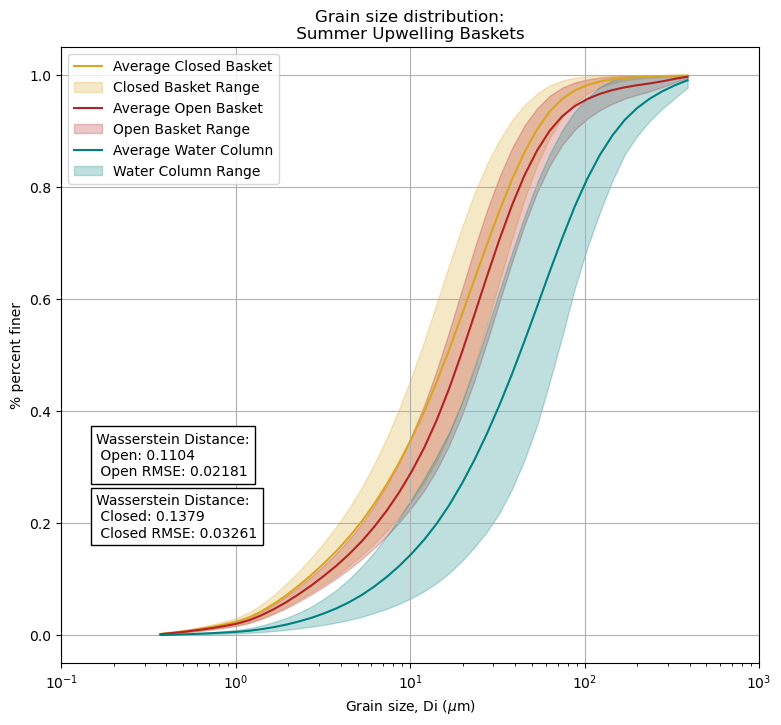

In [25]:
# determining parameters
title = "Grain size distribution:\n Summer Upwelling Baskets "
outname = "summer_upwelling_baskets"

# calculating Wasserstein distance and RMSE
summer_distance_closed = np.round(wasserstein_distance(summer_closed_upwelling, summer_wc_gsd_avg_array), 4)
summer_rmse_closed = np.round(np.mean((summer_closed_upwelling - summer_wc_gsd_avg_array)**2), 5)
summer_distance_open = np.round(wasserstein_distance(summer_open_upwelling, summer_wc_gsd_avg_array), 4)
summer_rmse_open = np.round(np.mean((summer_open_upwelling - summer_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, summer_closed_upwelling, color='goldenrod', 
                label="Average Closed Basket", linestyle="solid")
plt.fill_between(grain_sizes, summer_closed_upwelling_min, summer_closed_upwelling_max, color="goldenrod",
                label="Closed Basket Range", alpha=0.25)
plt.plot(grain_sizes, summer_open_upwelling, color='firebrick',
                label="Average Open Basket", linestyle="solid") 
plt.fill_between(grain_sizes, summer_open_upwelling_min, summer_open_upwelling_max, color="firebrick",
                label="Open Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, summer_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, summer_wc_gsd_min, summer_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + "Closed: " + str(summer_distance_closed) + "\n Closed RMSE: " + str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Wasserstein Distance:\n " + "Open: " + str(summer_distance_open) + "\n Open RMSE: " + str(summer_rmse_open)
plt.text(0.05, 0.3, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()


Downwelling

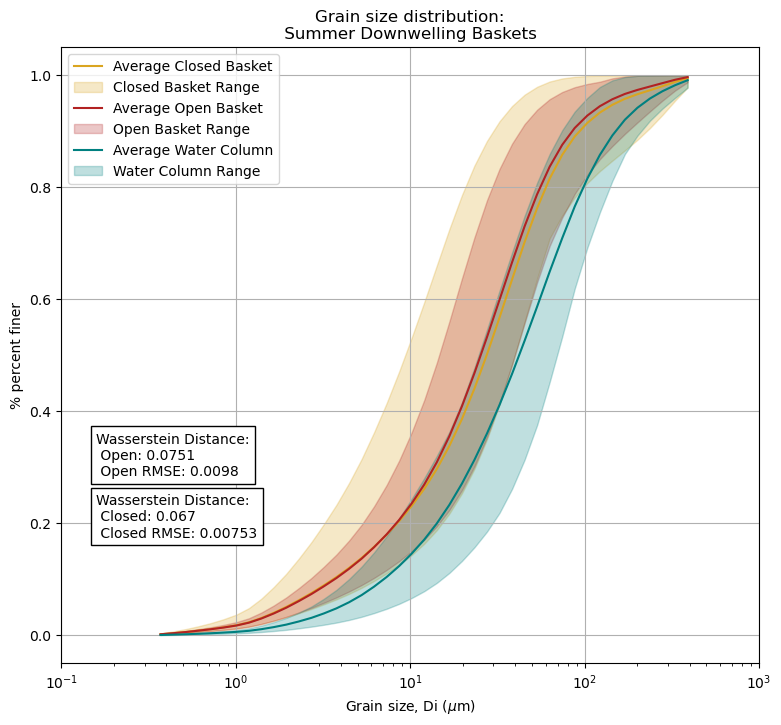

In [26]:
# determining parameters
title = "Grain size distribution:\n Summer Downwelling Baskets "
outname = "summer_downwelling_baskets"

# calculating Wasserstein distance and RMSE
summer_distance_closed = np.round(wasserstein_distance(summer_closed_downwelling, summer_wc_gsd_avg_array), 4)
summer_rmse_closed = np.round(np.mean((summer_closed_downwelling - summer_wc_gsd_avg_array)**2), 5)
summer_distance_open = np.round(wasserstein_distance(summer_open_downwelling, summer_wc_gsd_avg_array), 4)
summer_rmse_open = np.round(np.mean((summer_open_downwelling - summer_wc_gsd_avg_array)**2), 5)

# actual plot
plt.figure(figsize=(9, 8))
plt.rcParams.update({'figure.facecolor': 'white'})
# baskets
plt.plot(grain_sizes, summer_closed_downwelling, color='goldenrod', 
                label="Average Closed Basket", linestyle="solid")
plt.fill_between(grain_sizes, summer_closed_downwelling_min, summer_closed_downwelling_max, color="goldenrod",
                label="Closed Basket Range", alpha=0.25)
plt.plot(grain_sizes, summer_open_downwelling, color='firebrick',
                label="Average Open Basket", linestyle="solid")
plt.fill_between(grain_sizes, summer_open_downwelling_min, summer_open_downwelling_max, color="firebrick",
                label="Open Basket Range", alpha=0.25)
# water column
plt.plot(grain_sizes, summer_wc_gsd_avg, color="teal", 
                label="Average Water Column", linestyle="solid")
plt.fill_between(grain_sizes, summer_wc_gsd_min, summer_wc_gsd_max, color="teal",
                label="Water Column Range", alpha=0.25)

# text boxes
tempString1 = "Wasserstein Distance:\n " + "Closed: " + str(summer_distance_closed) + "\n Closed RMSE: " + str(summer_rmse_closed)
plt.text(0.05, 0.2, tempString1, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
tempString2 = "Wasserstein Distance:\n " + "Open: " + str(summer_distance_open) + "\n Open RMSE: " + str(summer_rmse_open)
plt.text(0.05, 0.3, tempString2, fontsize=10,
        horizontalalignment='left', verticalalignment='bottom',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

plt.xlabel("Grain size, Di ($\mu$m)")
plt.ylabel("% percent finer")
plt.title(title)
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.xlim((0.1, 1000))
plt.savefig(results_directory + outname + ".png", dpi=300)
plt.show()

### Comparing WD and RMSE by open and closed baskets

In [42]:
RMSE = {
    'Category': ['Avg Open Baskets', 'Avg Closed Baskets', 'Up Open', 'Up Closed', 'Down Open', 'Down Closed'],
    'Spring': [0.00924, 0.01205, 0.00929, 0.01322, 0.00922, 0.01149],
    'Summer': [0.00187, 0.0032, 0.02181, 0.03261, 0.0098, 0.00753] }
WD = {
    'Category': ['Avg Open Baskets', 'Avg Closed Baskets', 'Up Open', 'Up Closed', 'Down Open', 'Down Closed'],
    'Spring': [0.074, 0.0848, 0.0743, 0.0895, 0.0738, 0.0824],
    'Summer': [0.0358, 0.0466, 0.1104, 0.1379, 0.0751, 0.067]}
# convert to dataframes
RMSE = pd.DataFrame(RMSE)
WD = pd.DataFrame(WD)

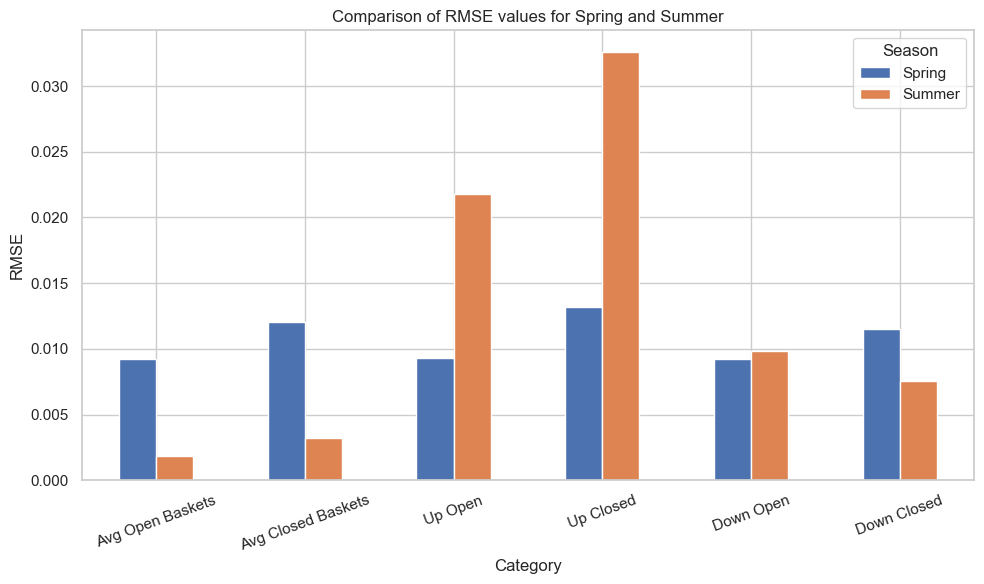

In [37]:
# Plotting
sns.set_theme(style="whitegrid")
RMSE.plot(x='Category', kind='bar', figsize=(10, 6))
plt.title('Comparison of RMSE values for Spring and Summer')
plt.ylabel('RMSE')
plt.xlabel('Category')
plt.xticks(rotation=20)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

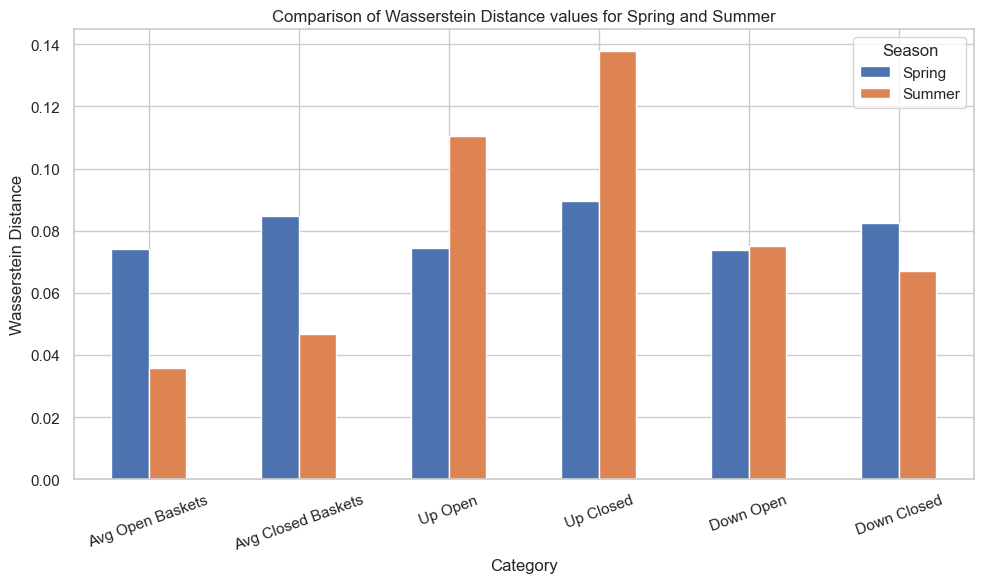

In [43]:
# Plotting
sns.set_theme(style="whitegrid")
WD.plot(x='Category', kind='bar', figsize=(10, 6))
plt.title('Comparison of Wasserstein Distance values for Spring and Summer')
plt.ylabel('Wasserstein Distance')
plt.xlabel('Category')
plt.xticks(rotation=20)
plt.legend(title='Season')
plt.tight_layout()
plt.show()